In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
def hist_1(pic, result):
    img  =  cv2 . imread (pic, 0 )

    hist,bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    
    plt.show()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    cv2.imwrite(result,img2)
    

In [3]:
def rgb_to_gray2(pic, result):
    x=Image.open(pic,'r')
    x=x.convert('L') #makes it greyscale
    y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0]))

    y=np.asarray(y,dtype=np.uint8) #if values still in range 0-255! 
    w=Image.fromarray(y,mode='L')
    w.save(result)

In [4]:
# выравнивание контрастности и яркости
   

In [5]:
def contrast2(pic, result):
    im = cv2.imread(pic, 0)
    cv2.adaptiveThreshold(im, im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, blockSize=31, param1=15)
    cv2.ShowImage('image', im)
    cv2.WaitKey(0)

In [8]:
from skimage import data, img_as_float
from skimage import exposure
def contrast3(pic,result):
    # Adaptive Equalization
    img = cv2.imread(pic)
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    plt.show()


In [9]:
contrast3('C:\\Users\\User\\VEINS\\pic_background_empty.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_contrast.png')

c:\pip\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
contrast2('C:\\Users\\User\\VEINS\\pic_background_black.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_contrast.png')

In [2]:
# работает со всеми, но с black_background лучше всего
def adaptive_thresholding(pic, result):
    img = cv2.imread(pic,0)
    img = cv2.medianBlur(img,5)
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

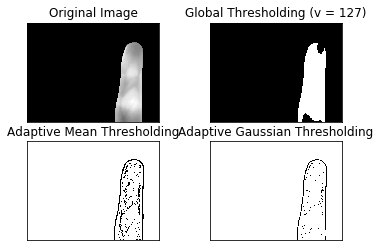

In [4]:
adaptive_thresholding('C:\\Users\\User\\VEINS\\pic_background_black.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_adaptive.png')

In [5]:
#  Не работает
def adaptive_thresholding2(pic, result):
    im = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
    cv2.adaptiveThreshold(im, im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY, 31, 15)
    cv2.ShowImage('image', im)

In [6]:
# adaptive_thresholding2('C:\\Users\\User\\VEINS\\pic_background_black.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_adaptive.png')

In [7]:
# Remove noise from threshold image opencv python
# работает с white and empty
# выделяет вены

def adaptiveThreshold3(pic, result):
    img_file = pic
    img = cv2.imread(img_file, cv2.IMREAD_COLOR)
    img = cv2.blur(img, (5, 5))

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    thresh0 = cv2.adaptiveThreshold(s, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    thresh1 = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    thresh2 = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    thresh = cv2.bitwise_or(thresh0, thresh1)

    cv2.imshow('Image-thresh0', thresh0)
    cv2.waitKey(0)
    cv2.imshow('Image-thresh1', thresh1)
    cv2.waitKey(0)
    cv2.imshow('Image-thresh2', thresh2)
    cv2.waitKey(0)
adaptiveThreshold3('C:\\Users\\User\\VEINS\\pic_background_black.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_adaptive.png')

In [ ]:
# rgb_to_gray('C:\\Users\\User\\VEINS\\pic1.png', 'C:\\Users\\User\\VEINS\\pic1_rgb.png')

In [ ]:
# rgb_to_gray2('C:\\Users\\User\\VEINS\\pic1.png', 'C:\\Users\\User\\VEINS\\pic1_rgb2.png')

In [ ]:
# hist_1('C:\\Users\\User\\VEINS\\pic_background_black.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_first_hist1.png')

In [ ]:
# не очень
# только с белым и пустым фонами
def adaptive_thresholding4(pic, result):
    img = cv2.imread(pic)
    grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    cv2.imshow('original',img)
    cv2.imshow('threshold',th)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
adaptive_thresholding4('C:\\Users\\User\\VEINS\\pic_background_empty.png', 'C:\\Users\\User\\VEINS\\result_pic_background_black_adaptive.png')